# Hubble constant

Find cosmological parameters with SuperNova Data

In [378]:
#librerias a usar 
import matplotlib. pyplot as plt
import numpy as np
import random
import scipy
import scipy.special
import math
from scipy.optimize import minimize
import scipy.stats as stats
import time
%matplotlib inline

In [379]:
tb1=np.loadtxt('jla_mub_covmatrix.dat')
tb2=np.loadtxt('jla_mub.txt')

# divido los datos de jla_mub.txt en dos arrelgos z y mu 
z=tb2[:,0]
mu=tb2[:,1]

In [380]:
#arreglo los datos de jla_mud_covmatrix.dat en una matriz de 31x31
covmatrix=[]
for i in range(31):
    row=[]
    for j in range(31):
        row.append(tb1[(31*i)+j])
    covmatrix.append(row)

In [381]:
#Pongo las varianzas de la matriz anterior (que se encuentran en la diagunal) en un arreglo.  
var=[]
for i in range(31):
    var.append(covmatrix[i][i])

In [382]:
def sss(omg):
    return pow((1-omg)/omg,(1/3))

In [383]:
def eta(a,omg):
    r=np.sqrt(pow(sss(omg),3)+1)
    return 2*r*pow((pow(a,-4)-(0.1540*sss(omg)*pow(a,-3))+(0.4304*pow(sss(omg),2)*pow(a,-2))+(0.19097*pow(sss(omg),3)*pow(a,-1))+(0.066941*pow(sss(omg),4))),-1/8)

In [384]:
#Solución aproximada
def D_L(z,omg,H):
    return (299792.458/H)*(1+z)*(eta(1,omg)-eta((1/(1+z)),omg))

In [385]:
def mud(z,omg,H):
    return 25+(5*np.log10(D_L(z,omg,H)))-(5*np.log10(H/100))

In [398]:
def lnlik (z,mu,var):
    
    fp=open('Tabla_datos.dat',"w")
    #fp.write("#Ho\tOmega\n")
        
    #Datos iniciales
    omg0=0.4
    H0=70.0
    sigma1=0.05
    sigma2=2
    
    lk0=0
    for k in range(len(z)):
        lk0=lk0+np.log(2*math.pi)+np.log(var[k])+(pow((mu[k]-mud(z[k],omg0,H0)),2)/var[k])
    lk0=-lk0/2.0    
    
    #Datos nuevos
    for i in range(10000):
        omg=np.random.normal(omg0,sigma1)
        H=np.random.normal(H0,sigma2)
        #fp.write("%f  \t%f \n" % (H0,omg0))
        if omg>0 and H>0:
            lki=0 
            for j in range(len(z)):
                lki=lki+np.log(2*math.pi)+np.log(var[j])+(pow((mu[j]-mud(z[j],omg,H)),2)/var[j])
            lki=-lki/2.0   
            if lki>lk0:
                omg0=omg
                H0=H
                lk0=lki
                fp.write("%f  \t%f \n" % (H0,omg0))
            else:
                pro=random.randrange(1,100000000)/100000000
                diff=lki-lk0
                if diff>np.log(pro):
                    omg0=omg
                    H0=H
                    fp.write("%f  \t%f \n" % (H0,omg0))
    fp.close()

In [399]:
lnlik(z,mu,var)

No handles with labels found to put in legend.


[]

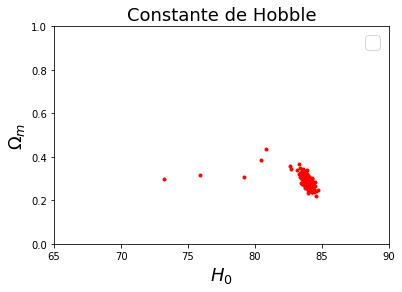

In [400]:
tbla1=np.loadtxt('Tabla_datos.dat')
H1=tbla1[:,0]
omh1=tbla1[:,1]
plt.ylim(0,1.0)
plt.xlim(65,90)
plt.plot(H1,omh1,'r.')
plt.xlabel('$H_0$',fontsize = 18)
plt.ylabel('$\Omega_m$',fontsize = 18)
plt.title(r'Constante de Hobble', fontsize = 18)
plt.legend(fontsize = 18)
plt.plot()

No handles with labels found to put in legend.


[]

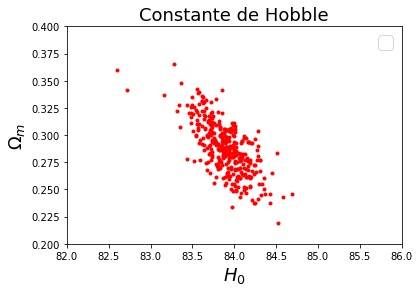

In [404]:
plt.plot(H1,omh1,'r.')
plt.ylim(0.2,0.40)
plt.xlim(82,86)
plt.xlabel('$H_0$',fontsize = 18)
plt.ylabel('$\Omega_m$',fontsize = 18)
plt.title(r'Constante de Hobble', fontsize = 18)
plt.legend(fontsize = 18)
plt.plot()